# To Prdeict the forest fire burn Area

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
import random

In [0]:
df = pd.read_csv("/content/forest_fires.csv")


In [110]:
df.head(50)

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0
5,8,6,aug,sun,92.3,85.3,488.0,14.7,22.2,29,5.4,0.0,0.0
6,8,6,aug,mon,92.3,88.9,495.6,8.5,24.1,27,3.1,0.0,0.0
7,8,6,aug,mon,91.5,145.4,608.2,10.7,8.0,86,2.2,0.0,0.0
8,8,6,sep,tue,91.0,129.5,692.6,7.0,13.1,63,5.4,0.0,0.0
9,7,5,sep,sat,92.5,88.0,698.6,7.1,22.8,40,4.0,0.0,0.0


In [111]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X       517 non-null    int64  
 1   Y       517 non-null    int64  
 2   month   517 non-null    object 
 3   day     517 non-null    object 
 4   FFMC    517 non-null    float64
 5   DMC     517 non-null    float64
 6   DC      517 non-null    float64
 7   ISI     517 non-null    float64
 8   temp    517 non-null    float64
 9   RH      517 non-null    int64  
 10  wind    517 non-null    float64
 11  rain    517 non-null    float64
 12  area    517 non-null    float64
dtypes: float64(8), int64(3), object(2)
memory usage: 52.6+ KB


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f0021754908>,
      dtype=object)

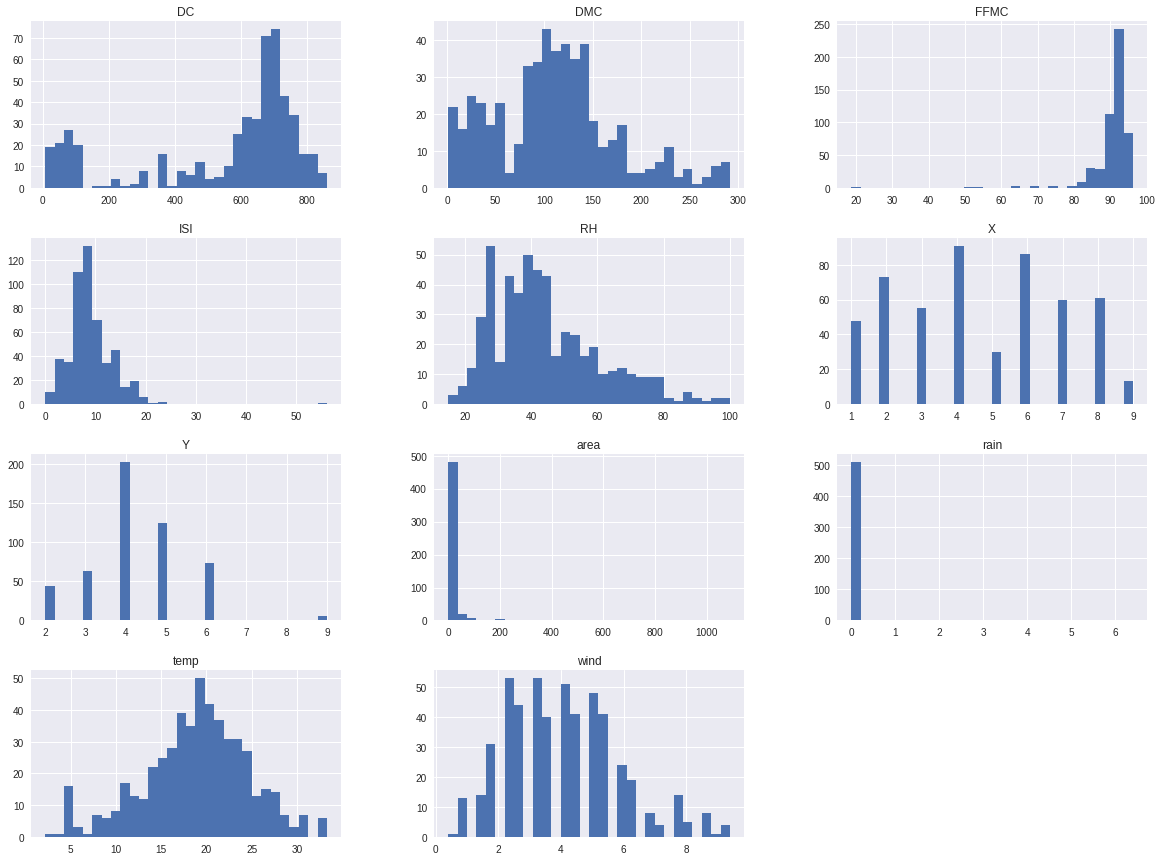

In [112]:
plt.style.use('seaborn')
df.hist(bins=30, figsize=(20,15))

# Lets convert days and month into integer 

In [0]:
df.month.replace(('jan','feb','mar','apr','may','jun','jul', 'aug','sep','oct','nov','dec'),(1,2,3,4,5,6,7,8,9,10,11,12),inplace=True)
df.day.replace(('mon','tue','wed','thu', 'fri','sat','sun'),(1,2,3,4,5,6,7),inplace=True)

In [114]:
# let find correlation 
df.corr()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
X,1.000000,0.539548,-0.065003,-0.024922,-0.021039,-0.048384,-0.085916,0.006210,-0.051258,0.085223,0.018798,0.065387,0.063385
Y,0.539548,1.000000,-0.066292,-0.005453,-0.046308,0.007782,-0.101178,-0.024488,-0.024103,0.062221,-0.020341,0.033234,0.044873
month,-0.065003,-0.066292,1.000000,-0.050837,0.291477,0.466645,0.868698,0.186597,0.368842,-0.095280,-0.086368,0.013438,0.056496
day,-0.024922,-0.005453,-0.050837,1.000000,-0.041068,0.062870,0.000105,0.032909,0.052190,0.092151,0.032478,-0.048340,0.023226
FFMC,-0.021039,-0.046308,0.291477,-0.041068,1.000000,0.382619,0.330512,0.531805,0.431532,-0.300995,-0.028485,0.056702,0.040122
DMC,-0.048384,0.007782,0.466645,0.062870,0.382619,1.000000,0.682192,0.305128,0.469594,0.073795,-0.105342,0.074790,0.072994
DC,-0.085916,-0.101178,0.868698,0.000105,0.330512,0.682192,1.000000,0.229154,0.496208,-0.039192,-0.203466,0.035861,0.049383
ISI,0.006210,-0.024488,0.186597,0.032909,0.531805,0.305128,0.229154,1.000000,0.394287,-0.132517,0.106826,0.067668,0.008258
temp,-0.051258,-0.024103,0.368842,0.052190,0.431532,0.469594,0.496208,0.394287,1.000000,-0.527390,-0.227116,0.069491,0.097844
RH,0.085223,0.062221,-0.095280,0.092151,-0.300995,0.073795,-0.039192,-0.132517,-0.527390,1.000000,0.069410,0.099751,-0.075519


Lets have look over data set central tendency


In [115]:
df.describe()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
count,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000
mean,4.669246,4.299807,7.475822,4.259188,90.644681,110.872340,547.940039,9.021663,18.889168,44.288201,4.017602,0.021663,12.847292
std,2.313778,1.229900,2.275990,2.072929,5.520111,64.046482,248.066192,4.559477,5.806625,16.317469,1.791653,0.295959,63.655818
min,1.000000,2.000000,1.000000,1.000000,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000,0.000000
25%,3.000000,4.000000,7.000000,2.000000,90.200000,68.600000,437.700000,6.500000,15.500000,33.000000,2.700000,0.000000,0.000000
50%,4.000000,4.000000,8.000000,5.000000,91.600000,108.300000,664.200000,8.400000,19.300000,42.000000,4.000000,0.000000,0.520000
75%,7.000000,5.000000,9.000000,6.000000,92.900000,142.400000,713.900000,10.800000,22.800000,53.000000,4.900000,0.000000,6.570000
max,9.000000,9.000000,12.000000,7.000000,96.200000,291.300000,860.600000,56.100000,33.300000,100.000000,9.400000,6.400000,1090.840000


In [0]:
from sklearn.model_selection import train_test_split
X,y = train_test_split(df,test_size=0.2, random_state= 2)
# lets make duplicate copy of our data set
work_set= X.copy() 

In [117]:
X.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
131,4,6,3,1,87.2,23.9,64.7,4.1,14.0,39,3.1,0.0,0.00
264,4,4,8,5,94.3,167.6,684.4,13.0,21.8,53,3.1,0.0,6.54
212,7,4,9,5,94.3,85.1,692.3,15.9,20.1,47,4.9,0.0,26.13
12,6,5,8,5,63.5,70.8,665.3,0.8,17.0,72,6.7,0.0,0.00
183,7,4,10,1,91.7,48.5,696.1,11.1,16.8,45,4.5,0.0,6.83


In [118]:
y.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
84,1,2,8,4,91.7,114.3,661.3,6.3,20.2,45,3.6,0.0,0.00
478,7,4,7,7,93.7,101.3,423.4,14.7,18.2,82,4.5,0.0,2.21
362,7,4,9,5,88.2,55.2,732.3,11.6,15.2,64,3.1,0.0,0.52
378,6,5,3,4,90.9,18.9,30.6,8.0,8.7,51,5.8,0.0,0.00
77,1,3,3,1,87.6,52.2,103.8,5.0,8.3,72,3.1,0.0,0.00


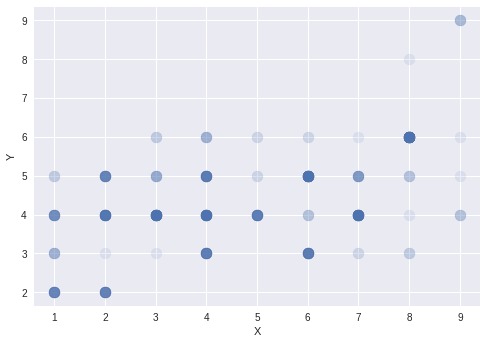

In [119]:
work_set.plot(kind='scatter', x='X',y= 'Y', alpha =0.1, s=120)

In [0]:
# Extracting featuresfrom the dataset

# converting to list
x_values = list(work_set['X'])
y_values = list(work_set['Y'])

loc_values = []

for index in range(0, len(x_values)):
    temp_value = []
    temp_value.append(x_values[index])
    temp_value.append(y_values[index])
    loc_values.append(temp_value)

In [0]:
# counting the instances location in the dataset

def count_points(x_points, y_points, scaling_factor):
    count_array = []
    
    for index in range(0, len(x_points)):
        temp_value = [x_points[index], y_points[index]]
        count = 0
        
        for value in loc_values:
            if(temp_value == value):
                count = count + 1
        count_array.append(count * scaling_factor )

    return count_array

In [122]:
work_set.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
131,4,6,3,1,87.2,23.9,64.7,4.1,14.0,39,3.1,0.0,0.00
264,4,4,8,5,94.3,167.6,684.4,13.0,21.8,53,3.1,0.0,6.54
212,7,4,9,5,94.3,85.1,692.3,15.9,20.1,47,4.9,0.0,26.13
12,6,5,8,5,63.5,70.8,665.3,0.8,17.0,72,6.7,0.0,0.00
183,7,4,10,1,91.7,48.5,696.1,11.1,16.8,45,4.5,0.0,6.83


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f0020f3d940>]],
      dtype=object)

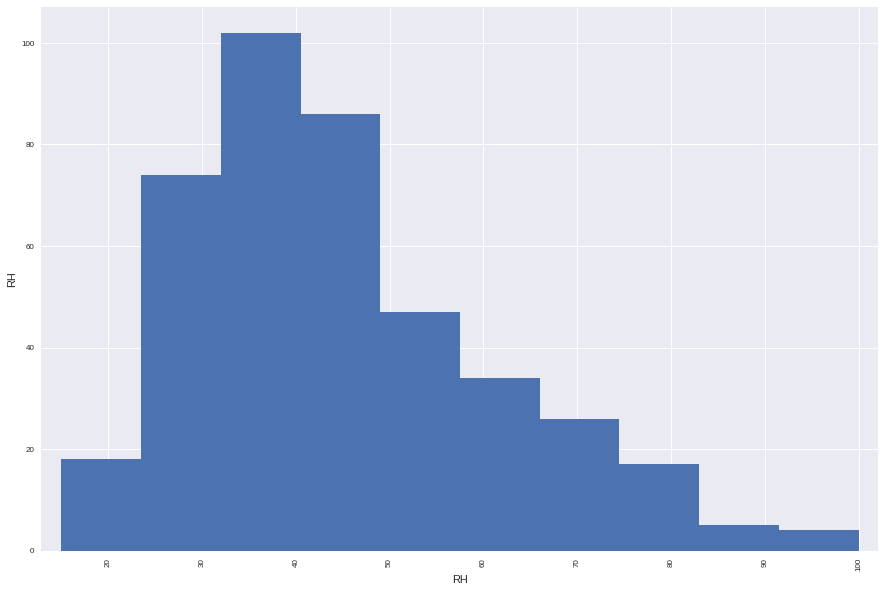

In [123]:
from pandas.plotting import scatter_matrix
attributes= ['RH']
scatter_matrix(work_set[attributes], figsize=(15,10))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f0020ea9f28>]],
      dtype=object)

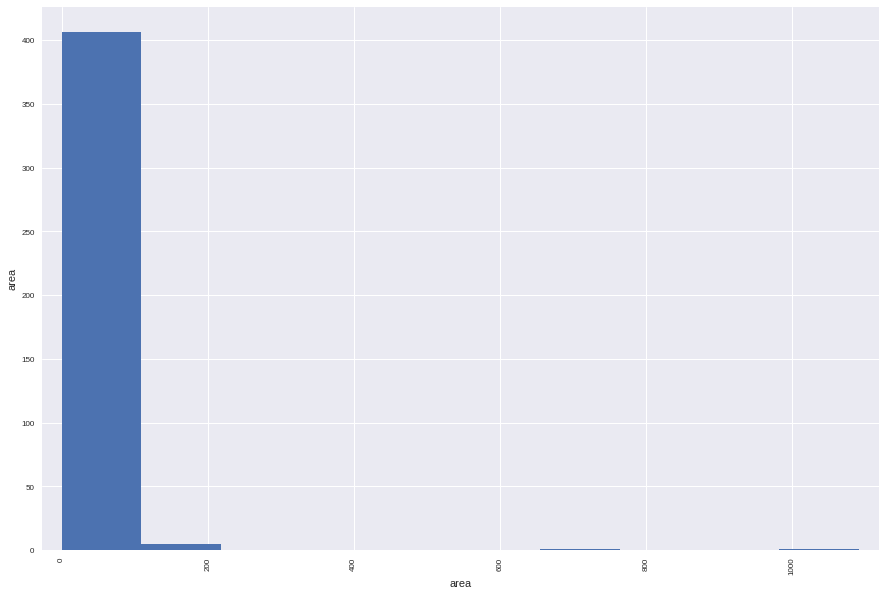

In [124]:
attributes = ['area']
scatter_matrix(work_set[attributes],figsize=(15,10))


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f0020e3d080>]],
      dtype=object)

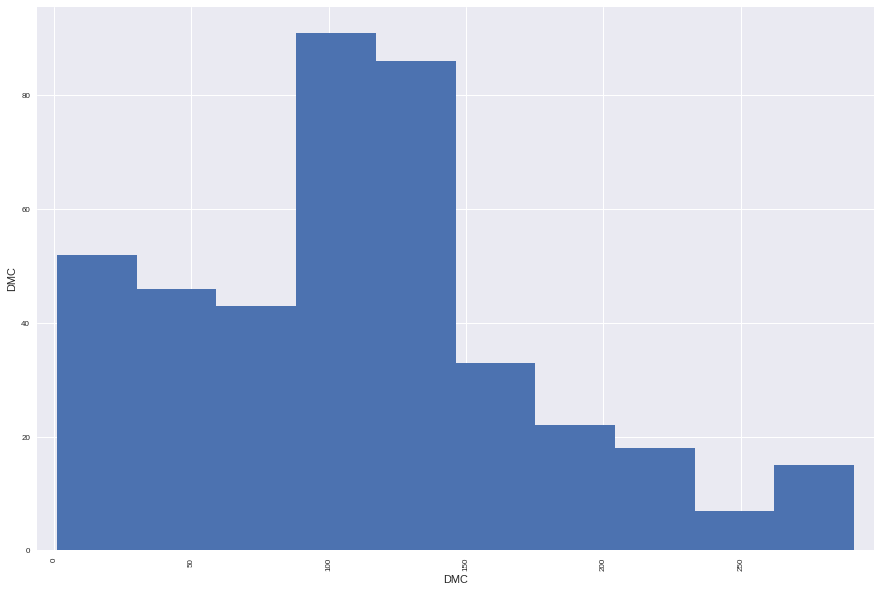

In [125]:
attributes = ['DMC']
scatter_matrix(work_set[attributes],figsize=(15,10))


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f00217e3208>]],
      dtype=object)

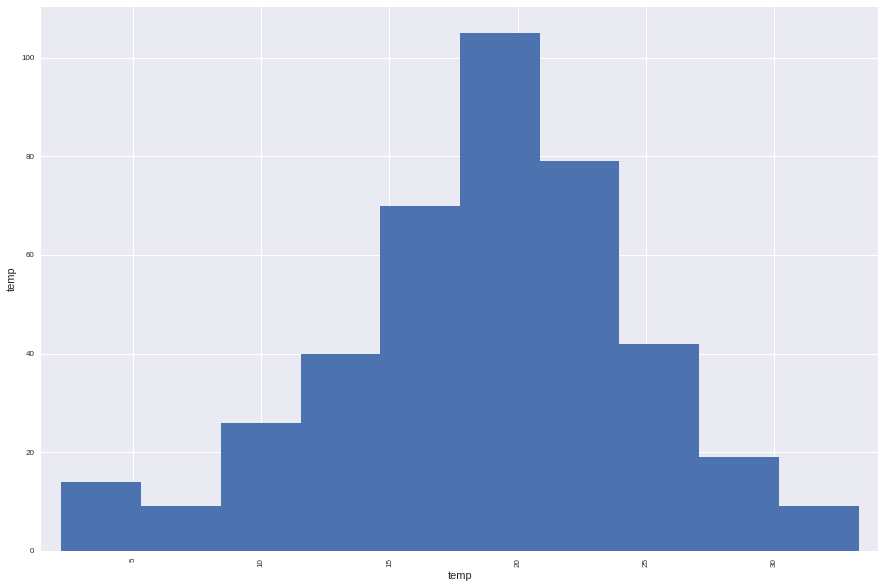

In [126]:
attributes = ['temp']
scatter_matrix(work_set[attributes],figsize=(15,10))


# Lets find unique value 

In [127]:
df['month'].unique()

array([ 3, 10,  8,  9,  4,  6,  7,  2,  1, 12,  5, 11])

In [128]:
df['day'].unique()

array([5, 2, 6, 7, 1, 3, 4])

In [129]:
df['area'].unique()

array([0.00000e+00, 3.60000e-01, 4.30000e-01, 4.70000e-01, 5.50000e-01,
       6.10000e-01, 7.10000e-01, 7.70000e-01, 9.00000e-01, 9.50000e-01,
       9.60000e-01, 1.07000e+00, 1.12000e+00, 1.19000e+00, 1.36000e+00,
       1.43000e+00, 1.46000e+00, 1.56000e+00, 1.61000e+00, 1.63000e+00,
       1.64000e+00, 1.69000e+00, 1.75000e+00, 1.90000e+00, 1.94000e+00,
       1.95000e+00, 2.01000e+00, 2.14000e+00, 2.29000e+00, 2.51000e+00,
       2.53000e+00, 2.55000e+00, 2.57000e+00, 2.69000e+00, 2.74000e+00,
       3.07000e+00, 3.50000e+00, 4.53000e+00, 4.61000e+00, 4.69000e+00,
       4.88000e+00, 5.23000e+00, 5.33000e+00, 5.44000e+00, 6.38000e+00,
       6.83000e+00, 6.96000e+00, 7.04000e+00, 7.19000e+00, 7.30000e+00,
       7.40000e+00, 8.24000e+00, 8.31000e+00, 8.68000e+00, 8.71000e+00,
       9.41000e+00, 1.00100e+01, 1.00200e+01, 1.09300e+01, 1.10600e+01,
       1.12400e+01, 1.13200e+01, 1.15300e+01, 1.21000e+01, 1.30500e+01,
       1.37000e+01, 1.39900e+01, 1.45700e+01, 1.54500e+01, 1.720

Lets define the method for plotting the graph
 

In [0]:
def histogram_plot(db, title):
    plt.figure(figsize=(8, 6))    
    
    ax = plt.subplot()    
    ax.spines["top"].set_visible(False)    
    ax.spines["bottom"].set_visible(False)    
    ax.spines["right"].set_visible(False)    
    ax.spines["left"].set_visible(False)
    
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left() 
    
    plt.title(title, fontsize = 22)
    plt.hist(db, edgecolor='black', linewidth=1.2)
    plt.show()

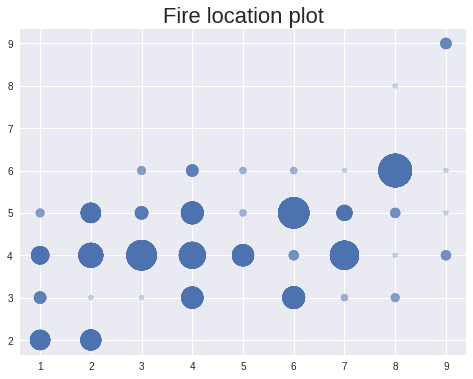

In [131]:
plt.figure(figsize=(8, 6))    
    
ax = plt.subplot()    
ax.spines["top"].set_visible(False)    
ax.spines["bottom"].set_visible(False)    
ax.spines["right"].set_visible(False)    
ax.spines["left"].set_visible(False)
    
ax.get_xaxis().tick_bottom()
ax.get_yaxis().tick_left() 
    
plt.title("Fire location plot", fontsize = 22)
plt.scatter(x_values, y_values, s = count_points(x_values, y_values, 25), alpha = 0.3)
plt.show()

In [0]:
# Standardizing the data (Feature Scaling) so that all the features are of the same scale
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

numerical_features = df.drop(['month', 'day'], axis=1)
scaled_features = scaler.fit_transform(numerical_features)

In [133]:
scaled_features

array([[ 1.00831277,  0.56986043, -0.80595947, ...,  1.49861442,
        -0.07326831, -0.20201979],
       [ 1.00831277, -0.24400101, -0.00810203, ..., -1.74175564,
        -0.07326831, -0.20201979],
       [ 1.00831277, -0.24400101, -0.00810203, ..., -1.51828184,
        -0.07326831, -0.20201979],
       ...,
       [ 1.00831277, -0.24400101, -1.64008316, ...,  1.49861442,
        -0.07326831, -0.02653216],
       [-1.58736044, -0.24400101,  0.68095666, ..., -0.00983371,
        -0.07326831, -0.20201979],
       [ 0.57570057, -1.05786246, -2.02087875, ...,  0.26950853,
        -0.07326831, -0.20201979]])

In [0]:
from sklearn.base import BaseEstimator, TransformerMixin

# defining the methods  for the AttributeSelector
class AttributeSelector(BaseEstimator, TransformerMixin):
    def __init__(self, attribute_names):
        self.attribute_names = attribute_names

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        return X[self.attribute_names].values

In [0]:
from sklearn.preprocessing import MultiLabelBinarizer
# defining the methods  for the CustomBinarizer
class CustomBinarizer(BaseEstimator, TransformerMixin):
    def __init__(self, class_labels):
        self.class_labels = class_labels
    def fit(self, X, y=None,**fit_params):
        return self
    def transform(self, X):
        return MultiLabelBinarizer(classes=self.class_labels).fit_transform(X)

In [0]:
from sklearn.pipeline import Pipeline


numerical_attributes = ['X', 'Y', 'FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind', 'rain'] # Selecting the numerical columns
categorical_attributes = ['month', 'day'] # # Selecting the categorical columns
categorical_classes = np.concatenate((df['month'].unique(), df['day'].unique()), axis=0)

# creating the separate numerical and categorical pipelines
numerical_pipeline = Pipeline([
    ('selector', AttributeSelector(numerical_attributes)),
    ('standardize', StandardScaler()),
])
categorical_pipeline = Pipeline([
    ('selector', AttributeSelector(categorical_attributes)),
    ('encode', CustomBinarizer(categorical_classes)),
])

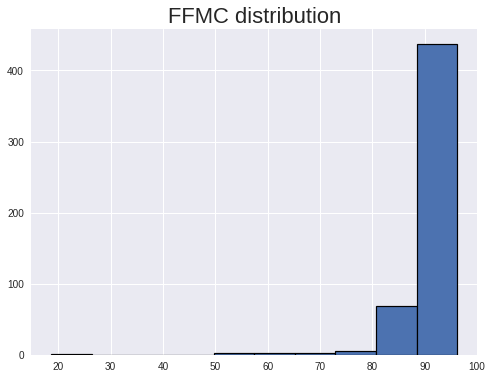

In [137]:
#FFMC distrubution
#  Creating Histogram based on FFMC attribute
histogram_plot(df['FFMC'], title = "FFMC distribution")
plt.show()

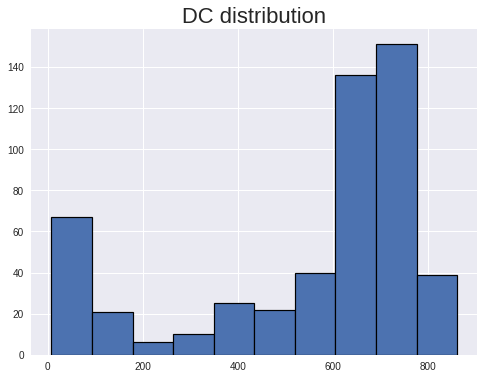

In [138]:
#DC distrubution
#  Creating Histogram based on DC attribute 
histogram_plot(df['DC'], title = "DC distribution")
plt.show()

In [0]:
#  Separating the features and labels into X and Y
X = df.iloc[:,[0,1,2,3,4,5,6,7,8,9,10,11]].values
Y = df.iloc[:, 11].values

In [0]:
# Separating the test and training set
train_x, test_x, train_y, test_y = train_test_split(X,Y, test_size=0.3, random_state = 9)
mse_values = []
variance_score = []

In [141]:
train_x

array([[ 7. ,  4. ,  9. , ..., 44. ,  2.2,  0. ],
       [ 4. ,  3. ,  8. , ..., 42. ,  4.9,  0. ],
       [ 1. ,  5. ,  9. , ..., 27. ,  3.1,  0. ],
       ...,
       [ 7. ,  5. ,  8. , ..., 65. ,  4.9,  0.8],
       [ 3. ,  4. ,  9. , ..., 57. ,  4.5,  0. ],
       [ 8. ,  6. ,  8. , ..., 29. ,  1.8,  0. ]])

In [142]:
train_y

array([0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ,
       0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ,
       0. , 0. , 0. , 0. , 6.4, 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ,
       0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ,
       0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ,
       0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ,
       0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ,
       0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ,
       0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ,
       0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ,
       0. , 0.2, 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ,
       0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ,
       0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ,
       0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0.

Further algorithm need to be apply